# Ordnary Least Square Regression
# Mariam Arzumanyan


## Linear Models and OLS
Linear models are one of the most important models in statistics. 

For any given vector of inputs $X=(X_1,X_2,...,X_p)$, and inputs $Y$, the linear model predicts:
\begin{equation}
\hat{Y}=\hat{\beta_0}+\sum_{j=1}^pX_j\hat{\beta_j}.
\end{equation}

To fit the model, $least$ $squares$ minimizes the residual sum of squares:
\begin{equation}
RSS(\beta)=\sum_{i=1}^N (y_i-x_i^T\beta)^2.
\end{equation}

If $X^TX$ is nonsingular, then:
\begin{equation}
\hat{\beta}=(X^TX)^{-1}X^Ty.
\end{equation}

Import modules. 

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

Load the publicly available dataset.

In [2]:
data = sm.datasets.longley.load_pandas().data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOTEMP   16 non-null     float64
 1   GNPDEFL  16 non-null     float64
 2   GNP      16 non-null     float64
 3   UNEMP    16 non-null     float64
 4   ARMED    16 non-null     float64
 5   POP      16 non-null     float64
 6   YEAR     16 non-null     float64
dtypes: float64(7)
memory usage: 1.0 KB


In [3]:
data.columns

Index(['TOTEMP', 'GNPDEFL', 'GNP', 'UNEMP', 'ARMED', 'POP', 'YEAR'], dtype='object')

In [4]:
data.describe()

,TOTEMP,GNPDEFL,GNP,UNEMP,ARMED,POP,YEAR
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,65317.000000,101.681250,387698.437500,3193.312500,2606.687500,117424.000000,1954.500000
std,3511.968356,10.791553,99394.937795,934.464247,695.919604,6956.101561,4.760952
min,60171.000000,83.000000,234289.000000,1870.000000,1456.000000,107608.000000,1947.000000
25%,62712.500000,94.525000,317881.000000,2348.250000,2298.000000,111788.500000,1950.750000
50%,65504.000000,100.600000,381427.000000,3143.500000,2717.500000,116803.500000,1954.500000
75%,68290.500000,111.250000,454085.500000,3842.500000,3060.750000,122304.000000,1958.250000
max,70551.000000,116.900000,554894.000000,4806.000000,3594.000000,130081.000000,1962.000000


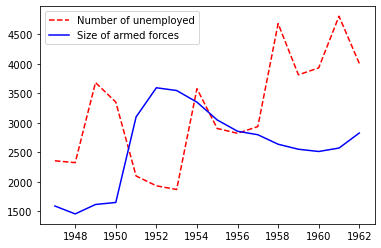

In [5]:
%matplotlib inline
fig, ax=plt.subplots()
ax.plot(data["YEAR"], data["UNEMP"], "r--")
ax.plot(data["YEAR"], data["ARMED"], "b")
plt.legend(["Number of unemployed", "Size of armed forces"])
plt.show()

In [6]:
ols_reg=sm.OLS(data["UNEMP"],data["ARMED"])

In [7]:
results=ols_reg.fit()

In [8]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                  UNEMP   R-squared (uncentered):                   0.845
Model:                            OLS   Adj. R-squared (uncentered):              0.835
Method:                 Least Squares   F-statistic:                              81.96
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    1.82e-07
Time:                        12:31:49   Log-Likelihood:                         -137.49
No. Observations:                  16   AIC:                                      277.0
Df Residuals:                      15   BIC:                                      277.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [9]:
ols_reg_1=smf.ols("TOTEMP~UNEMP + ARMED", data).fit()

In [10]:
print(ols_reg_1.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                     8.301
Date:                Mon, 08 Nov 2021   Prob (F-statistic):            0.00475
Time:                        12:31:49   Log-Likelihood:                -146.23
No. Observations:                  16   AIC:                             298.5
Df Residuals:                      13   BIC:                             300.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.066e+04   3661.202     13.838      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [11]:
ols_reg_2=smf.ols("TOTEMP~UNEMP + ARMED+0", data).fit()
print(ols_reg_2.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   0.981
Model:                            OLS   Adj. R-squared (uncentered):              0.979
Method:                 Least Squares   F-statistic:                              367.9
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    7.91e-13
Time:                        12:31:49   Log-Likelihood:                         -168.27
No. Observations:                  16   AIC:                                      340.5
Df Residuals:                      14   BIC:                                      342.1
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [12]:
ols_reg_3=smf.ols("TOTEMP~UNEMP + ARMED+GNP", data).fit()
print(ols_reg_3.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.981
Method:                 Least Squares   F-statistic:                     264.4
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           3.19e-11
Time:                        12:31:49   Log-Likelihood:                -119.16
No. Observations:                  16   AIC:                             246.3
Df Residuals:                      12   BIC:                             249.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.331e+04    716.342     74.415      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [13]:
ols_reg_4=smf.ols("TOTEMP~UNEMP + ARMED+GNP+POP", data).fit()
print(ols_reg_4.summary())

                            OLS Regression Results                            
Dep. Variable:                 TOTEMP   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     212.2
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.49e-10
Time:                        12:31:50   Log-Likelihood:                -117.94
No. Observations:                  16   AIC:                             245.9
Df Residuals:                      11   BIC:                             249.7
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.261e+04   2.18e+04      3.794      0.0

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [14]:
ols_reg_5=smf.ols("TOTEMP~UNEMP + ARMED+GNP+POP+0", data).fit()
print(ols_reg_5.summary())

                                 OLS Regression Results                                
Dep. Variable:                 TOTEMP   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.758e+04
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    1.81e-24
Time:                        12:31:50   Log-Likelihood:                         -124.63
No. Observations:                  16   AIC:                                      257.3
Df Residuals:                      12   BIC:                                      260.4
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [15]:
print("Percentage change %4.2f%%\n"*4 % tuple([i for i in (ols_reg_5.params - ols_reg_5.params)/ols_reg_5.params*100]))

Percentage change -0.00%
Percentage change -0.00%
Percentage change 0.00%
Percentage change 0.00%



In [16]:
infl = ols_reg_5.get_influence()
infl

Next dataset.

In [17]:
sm.datasets.get_rdataset("Guerry", "HistData")

<class 'statsmodels.datasets.utils.Dataset'>

In [18]:
dir(sm.datasets.get_rdataset("Guerry", "HistData"))

['__class__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 'clear',
 'copy',
 'data',
 'from_cache',
 'fromkeys',
 'get',
 'items',
 'keys',
 'package',
 'pop',
 'popitem',
 'setdefault',
 'title',
 'update',
 'values']

In [19]:
data=sm.datasets.get_rdataset("Guerry", "HistData").data
data.describe()

,dept,Crime_pers,Crime_prop,Literacy,Donations,Infants,Suicides,Wealth,Commerce,Clergy,Crime_parents,Infanticide,Donation_clergy,Lottery,Desertion,Instruction,Prostitutes,Distance,Area,Pop1831
count,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000
mean,46.883721,19754.406977,7843.058140,39.255814,7075.546512,19049.906977,36522.604651,43.500000,42.802326,43.430233,43.500000,43.511628,43.500000,43.500000,43.500000,43.127907,141.872093,207.953140,6146.988372,378.628721
std,30.426157,7504.703073,3051.352839,17.364051,5834.595216,8820.233546,31312.532649,24.969982,25.028370,24.999549,24.969982,24.948297,24.969982,24.969982,24.969982,24.799809,520.969318,109.320837,1398.246620,148.777230
min,1.000000,2199.000000,1368.000000,12.000000,1246.000000,2660.000000,3460.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,762.000000,129.100000
25%,24.250000,14156.250000,5933.000000,25.000000,3446.750000,14299.750000,15463.000000,22.250000,21.250000,22.250000,22.250000,22.250000,22.250000,22.250000,22.250000,23.250000,6.000000,121.383000,5400.750000,283.005000
50%,45.500000,18748.500000,7595.000000,38.000000,5020.000000,17141.500000,26743.500000,43.500000,42.500000,43.500000,43.500000,43.500000,43.500000,43.500000,43.500000,41.500000,33.000000,200.616000,6070.500000,346.165000
75%,66.750000,25937.500000,9182.250000,51.750000,9446.750000,22682.250000,44057.500000,64.750000,63.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,64.750000,113.750000,289.670500,6816.500000,444.407500
max,200.000000,37014.000000,20235.000000,74.000000,37015.000000,62486.000000,163241.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,86.000000,4744.000000,539.213000,10000.000000,989.940000


In [20]:
ols_reg = smf.ols('Wealth ~ Literacy', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                 Wealth   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.916
Date:                Mon, 08 Nov 2021   Prob (F-statistic):             0.0102
Time:                        12:31:50   Log-Likelihood:                -394.84
No. Observations:                  86   AIC:                             793.7
Df Residuals:                      84   BIC:                             798.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.0701      6.468      9.133      0.0

In [21]:
ols_reg = smf.ols('Donations ~ Literacy+Wealth+0', data).fit()
print(ols_reg.summary())

                                 OLS Regression Results                                
Dep. Variable:              Donations   R-squared (uncentered):                   0.542
Model:                            OLS   Adj. R-squared (uncentered):              0.532
Method:                 Least Squares   F-statistic:                              49.80
Date:                Mon, 08 Nov 2021   Prob (F-statistic):                    5.46e-15
Time:                        12:31:50   Log-Likelihood:                         -872.85
No. Observations:                  86   AIC:                                      1750.
Df Residuals:                      84   BIC:                                      1755.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [22]:
ols_reg = smf.ols('Donations ~ Literacy+Wealth', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:              Donations   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.7893
Date:                Mon, 08 Nov 2021   Prob (F-statistic):              0.458
Time:                        12:31:50   Log-Likelihood:                -866.47
No. Observations:                  86   AIC:                             1739.
Df Residuals:                      83   BIC:                             1746.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8059.3492   2211.992      3.643      0.0

In [23]:
ols_reg = smf.ols('Crime_pers ~ Literacy+Crime_prop', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:             Crime_pers   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     3.629
Date:                Mon, 08 Nov 2021   Prob (F-statistic):             0.0308
Time:                        12:31:50   Log-Likelihood:                -885.32
No. Observations:                  86   AIC:                             1777.
Df Residuals:                      83   BIC:                             1784.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.264e+04   3484.180      3.628      0.0

In [24]:
ols_reg = smf.ols('Suicides ~ Infants', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Suicides   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     7.600
Date:                Mon, 08 Nov 2021   Prob (F-statistic):            0.00716
Time:                        12:31:51   Log-Likelihood:                -1008.1
No. Observations:                  86   AIC:                             2020.
Df Residuals:                      84   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.704e+04   7778.834      2.191      0.0

In [25]:
ols_reg = smf.ols('Suicides ~ Infants+Prostitutes', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:               Suicides   R-squared:                       0.102
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     4.738
Date:                Mon, 08 Nov 2021   Prob (F-statistic):             0.0113
Time:                        12:31:51   Log-Likelihood:                -1007.1
No. Observations:                  86   AIC:                             2020.
Df Residuals:                      83   BIC:                             2028.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    2.104e+04   8293.689      2.537      

In [26]:
ols_reg = smf.ols('Lottery ~ Literacy', data).fit()
print(ols_reg.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     12.89
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           0.000555
Time:                        12:31:51   Log-Likelihood:                -392.11
No. Observations:                  86   AIC:                             788.2
Df Residuals:                      84   BIC:                             793.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.0896      6.265     10.230      0.0

In [27]:
ols_reg.params

Intercept    64.089550
Literacy     -0.524497
dtype: float64

In [28]:
print('Parameters: ', ols_reg.params)
print('Standard errors: ', ols_reg.bse)

Parameters:  Intercept    64.089550
Literacy     -0.524497
dtype: float64
Standard errors:  Intercept    6.265028
Literacy     0.146093
dtype: float64


In [29]:
print('Predicted values: ', ols_reg.predict())

Predicted values:  [44.68316727 37.34021161 57.27109127 39.96269578 27.89926862 49.92813561
 28.94826228 54.6486071  33.14423695 46.25665777 47.83014827 44.15867044
 36.81571478 47.83014827 45.20766411 43.63417361 57.27109127 57.7955881
 32.61974011 55.69760077 52.02612294 54.6486071  25.80128128 42.06068311
 37.34021161 35.76672111 56.2220976  43.10967678 47.83014827 44.15867044
 43.10967678 40.48719261 50.97712927 55.17310394 49.92813561 48.87914194
 25.80128128 49.40363877 49.92813561 48.87914194 53.0751166  51.5016261
 42.06068311 51.5016261  47.83014827 49.92813561 52.02612294 41.53618628
 31.04624961 26.32577812 54.12411027 28.42376545 25.27678445 56.74659444
 34.19323061 53.59961344 40.48719261 35.76672111 40.48719261 38.38920528
 54.12411027 39.43819894 36.29121795 47.83014827 31.57074645 26.85027495
 40.48719261 33.14423695 47.30565144 48.35464511 26.85027495 41.53618628
 35.76672111 34.71772745 42.58517994 41.01168944 53.59961344 50.97712927
 52.02612294 44.68316727 49.403638